<a href="https://colab.research.google.com/github/Milanka00/Anxiety-level-classification/blob/main/Anxiety_Level_Classification_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anxiety Level Classification

# 1. Project overview

This project aims to build a machine learning model for **multi-class classification of anxiety levels** based on demographic, clinical and behavioral data.






**Problem Statement**

Anxiety disorders affect millions globally, and accurate classification of anxiety levels can help in better diagnosis and treatment planning. This project utilizes a dataset with demographic, psychological, and behavioral variables to classify anxiety levels into 4 distinct categories as **Mild, None-minimal,Moderate and Severe.**

**Dataset Description**

The dataset consists of 1566 records with the following key features:

*   age (int): Age of the individual.
*   gender (object): Gender of the individual
*   bmi (float): Body Mass Index of the individual
*   who_bmi (object): BMI category based on WHO standards.
*   phq_score (int): Patient Health Questionnaire score.
*   depression_severity (object): Severity of depression.
*   depressiveness (object): Self-reported level of depressiveness.
*   suicidal (object): Suicidal tendencies
*   depression_diagnosis (object): History of depression diagnosis.
*   depression_treatment (object): History of receiving depression treatment.
*   anxiety_diagnosis (object): History of anxiety diagnosis.
*   anxiety_treatment (object): History of receiving anxiety treatment.
*   epworth_score (float): Epworth Sleepiness Scale score.
*   sleepiness (object): Self-reported level of sleepiness.
*   anxiousness (object): Self-reported level of anxiousness.
*   anxiety_severity (object): Severity of anxiety.

Source:

https://www.kaggle.com/datasets/mahmoudosama22/anxiety-dataset

# 2. Installing necessary librairies and fetching the data set:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
from sklearn.ensemble import RandomForestClassifier

Mounted at /content/drive


In [ ]:
# Fetch the dataset
file_path = '/content/drive/My Drive/ML/Data/Anxiety_data.csv'

# Load features and target into a single DataFrame
data = pd.read_csv(file_path)

In [ ]:
data.head(10)

,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,Moderate,True,False,False,7.0,False
1,18,male,19.841270,Normal,8,Mild,False,False,False,False,Mild,False,False,False,14.0,True
2,19,male,25.102391,Overweight,8,Mild,False,False,False,False,Mild,False,False,False,6.0,False
3,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,Severe,True,False,False,11.0,True
4,18,male,25.617284,Overweight,6,Mild,False,False,False,False,Moderate,True,False,False,3.0,False
5,18,male,22.129740,Normal,3,None-minimal,False,False,False,False,None-minimal,False,False,False,2.0,False
6,18,male,22.408787,Normal,6,Mild,False,False,False,False,None-minimal,False,False,False,3.0,False
7,19,male,20.482476,Normal,4,None-minimal,False,False,False,False,Mild,False,False,False,5.0,False
8,20,male,21.227888,Normal,11,Moderate,True,False,False,False,Mild,False,False,False,7.0,False
9,19,male,24.489796,Normal,6,Mild,False,False,False,False,None-minimal,False,False,False,9.0,False


# 3. Data Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566 entries, 0 to 1565
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1566 non-null   int64  
 1   gender                1566 non-null   object 
 2   bmi                   1566 non-null   float64
 3   who_bmi               1566 non-null   object 
 4   phq_score             1566 non-null   int64  
 5   depression_severity   1558 non-null   object 
 6   depressiveness        1560 non-null   object 
 7   suicidal              1564 non-null   object 
 8   depression_diagnosis  1564 non-null   object 
 9   depression_treatment  1558 non-null   object 
 10  anxiety_severity      1566 non-null   object 
 11  anxiousness           1554 non-null   object 
 12  anxiety_diagnosis     1558 non-null   object 
 13  anxiety_treatment     1562 non-null   object 
 14  epworth_score         1550 non-null   float64
 15  sleepiness           

In [ ]:
data.shape

(1566, 16)

**3.1 Data Cleaning**

In [ ]:
# exploring unique values in the data set
for i in data.columns:
    print('unique values in "{}":\n'.format(i),data[i].unique())

unique values in "age":
 [19 18 20 21 24 23 26 22 31 25 28 27 30]
unique values in "gender":
 ['male' 'female']
unique values in "bmi":
 [33.33333333 19.84126984 25.10239133 23.73866213 25.61728395 22.12973973
 22.40878677 20.4824761  21.22788762 24.48979592 23.12406059  0.
 28.73192149 22.79032897 22.83737024 19.59183673 22.10028959 24.03460984
 20.83070319 27.33564014 20.74755019 26.5625     26.88093499 24.38652644
 22.75830678 23.98687034 24.77591213 25.         20.07733492 21.60493827
 28.44444444 41.03826819 24.21229339 21.41094498 29.32098765 23.24380165
 28.247696   22.28259211 22.85714286 20.57142857 22.67995241 23.52941176
 27.51338489 23.51020408 23.30668005 21.77843524 21.77384236 18.75
 19.43634597 20.66115702 19.10009183 22.43230252 28.398718   18.25310979
 27.21730295 20.83252961 21.0076678  18.77834467 17.77777778 19.22337562
 23.37257618 23.95019768 18.31425598 51.89432429 23.63403301 22.58270917
 54.55266812 26.44628099 19.921875   23.1206236  24.6097337  31.91930799
 

Anxiety severity contain '0 '. Likely to represent missing, undefined, or incorrect data. It could also signify no anxiety but no confirmation is there. Therefore decided to remove those records.

In [ ]:
data.drop(data[data['anxiety_severity'] == '0'].index, inplace=True)

In [ ]:
data.shape

(1554, 16)

In [ ]:
data['anxiety_severity'].value_counts()

,count
anxiety_severity,
Mild,606
None-minimal,568
Moderate,248
Severe,132


**3.2 Data Visualization**

In [ ]:
#separate numeric and categorical columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(exclude=[np.number]).columns

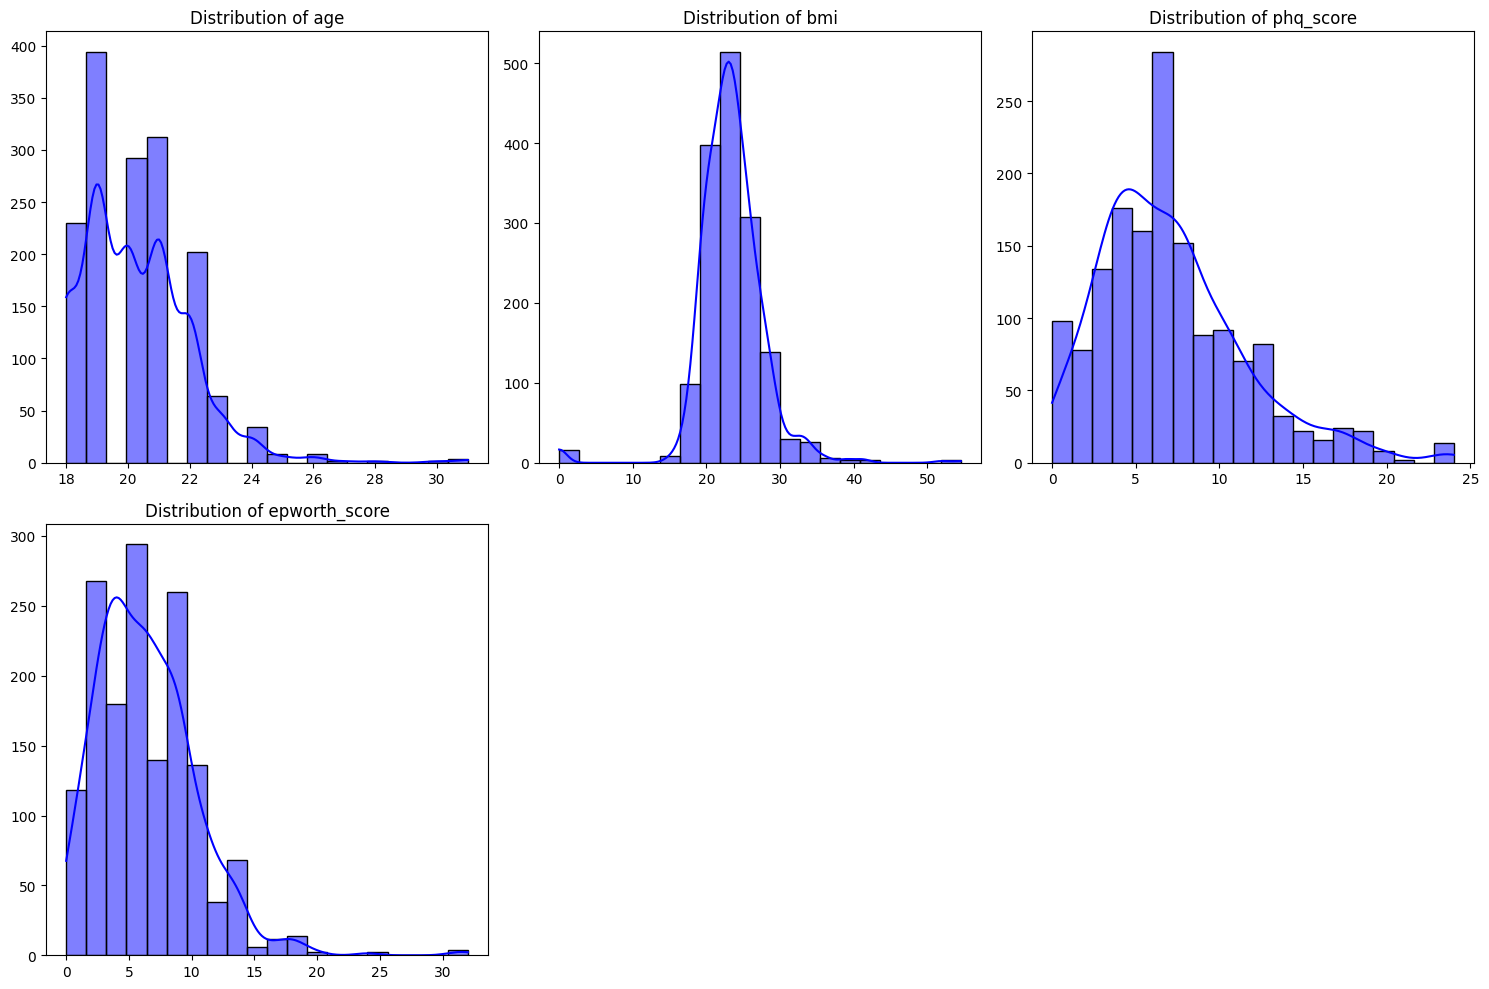

In [ ]:
# Plot numeric columns
if len(numeric_cols) > 0:
    rows = (len(numeric_cols) + 2) // 3
    plt.figure(figsize=(15, 5 * rows))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, 3, i)
        sns.histplot(data[col], kde=True, bins=20, color='blue')
        plt.title(f'Distribution of {col}')
        plt.xlabel('')
        plt.ylabel('')
    plt.tight_layout()

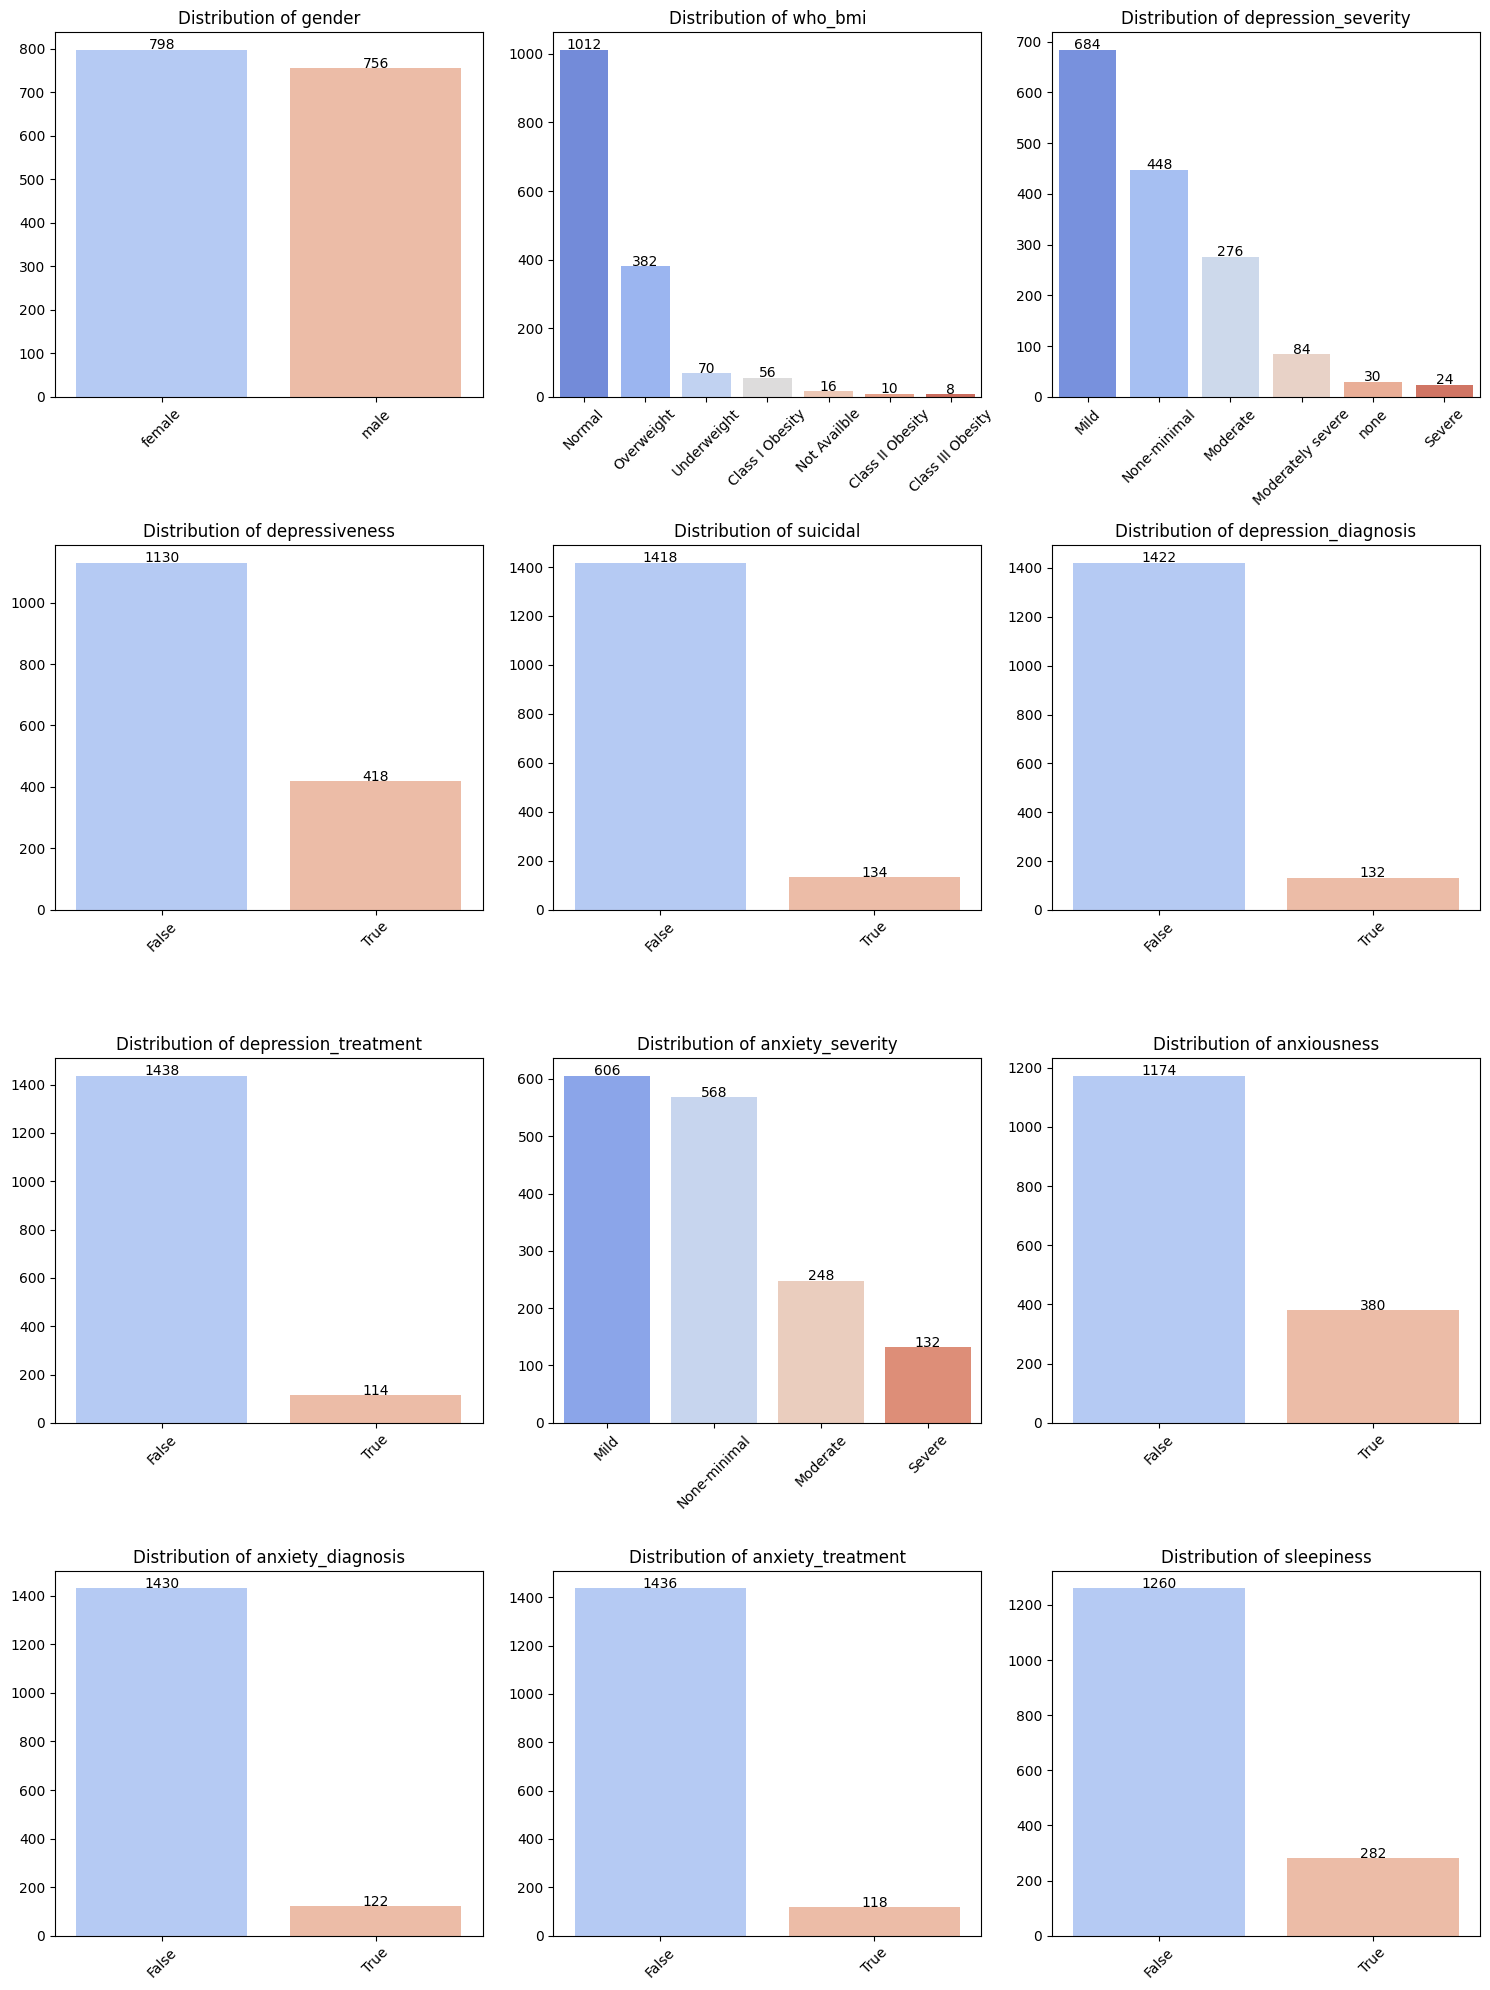

In [ ]:
# Plot categorical columns
if len(categorical_cols) > 0:
    rows = (len(categorical_cols) + 2) // 3
    plt.figure(figsize=(15, 5 * rows))
    for i, col in enumerate(categorical_cols, 1):
        plt.subplot(rows, 3, i)
        sns.countplot(x=data[col], palette='coolwarm', order=data[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        for patch in plt.gca().patches:
            plt.text(patch.get_x() + patch.get_width() / 2, patch.get_height() + 1, int(patch.get_height()), ha='center')
        plt.xlabel('')
        plt.ylabel('')
        plt.xticks(rotation=45)
    plt.tight_layout()

**3.3 Handling missing values**

In [ ]:
print(data.isnull().sum())

age                      0
gender                   0
bmi                      0
who_bmi                  0
phq_score                0
depression_severity      8
depressiveness           6
suicidal                 2
depression_diagnosis     0
depression_treatment     2
anxiety_severity         0
anxiousness              0
anxiety_diagnosis        2
anxiety_treatment        0
epworth_score           12
sleepiness              12
dtype: int64


Numeric missing values can be filled with their mean and categorical ones can be filled with theor mode value.

In [ ]:
# Impute numeric columns with the mean
imputer_numeric = SimpleImputer(strategy='mean')
data[numeric_cols] = imputer_numeric.fit_transform(data[numeric_cols])

# Impute categorical/boolean columns with the most frequent value
imputer_categorical = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer_categorical.fit_transform(data[categorical_cols])

In [ ]:
print(data.isnull().sum())

age                     0
gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     0
depressiveness          0
suicidal                0
depression_diagnosis    0
depression_treatment    0
anxiety_severity        0
anxiousness             0
anxiety_diagnosis       0
anxiety_treatment       0
epworth_score           0
sleepiness              0
dtype: int64


**3.4 Handling outliers**

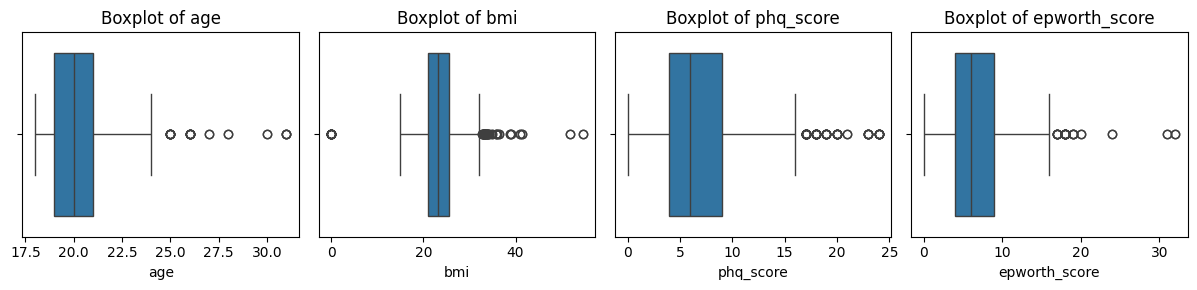

In [ ]:
# box plot visulization
plt.figure(figsize=(12, 3))

num_plots = len(numeric_cols)
num_cols = 4
num_rows = (num_plots // num_cols) + (1 if num_plots % num_cols != 0 else 0)

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()

In [ ]:
# Detecting outliers using IQR (Interquartile Range)
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_condition = (data[numeric_cols] < lower_bound) | (data[numeric_cols] > upper_bound)

# Count outliers per feature
outliers_count = outliers_condition.sum()
print("Outliers count per feature:")
print(outliers_count)

Outliers count per feature:
age              26
bmi              62
phq_score        70
epworth_score    28
dtype: int64


We can replace these outliers with lower and upper boundary values accordingly

In [ ]:
# Replace outliers with the lower or upper bound values
for col in numeric_cols:
    data[col] = np.where(data[col] < lower_bound[col], lower_bound[col], data[col])
    data[col] = np.where(data[col] > upper_bound[col], upper_bound[col], data[col])

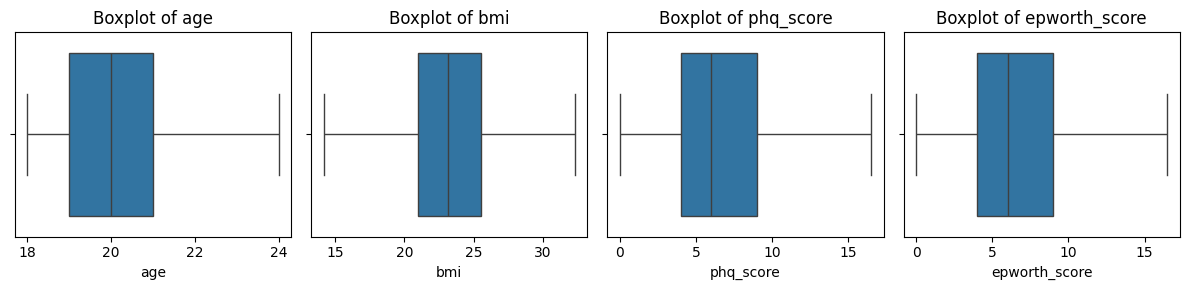

In [ ]:
# Visualize the distributions of numeric columns again
plt.figure(figsize=(12, 3))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

**3.5 Encoding categorical data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1554 entries, 0 to 1565
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1554 non-null   float64
 1   gender                1554 non-null   object 
 2   bmi                   1554 non-null   float64
 3   who_bmi               1554 non-null   object 
 4   phq_score             1554 non-null   float64
 5   depression_severity   1554 non-null   object 
 6   depressiveness        1554 non-null   object 
 7   suicidal              1554 non-null   object 
 8   depression_diagnosis  1554 non-null   object 
 9   depression_treatment  1554 non-null   object 
 10  anxiety_severity      1554 non-null   object 
 11  anxiousness           1554 non-null   object 
 12  anxiety_diagnosis     1554 non-null   object 
 13  anxiety_treatment     1554 non-null   object 
 14  epworth_score         1554 non-null   float64
 15  sleepiness            1554

In [ ]:

# Store mappings
label_mappings = {}

# Apply label encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])
    # Save the mapping for the current column
    label_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


# Print the mappings
for col, mapping in label_mappings.items():
    print(f"Mapping for column '{col}': {mapping}")


Mapping for column 'gender': {'female': 0, 'male': 1}
Mapping for column 'who_bmi': {'Class I Obesity': 0, 'Class II Obesity': 1, 'Class III Obesity': 2, 'Normal': 3, 'Not Availble': 4, 'Overweight': 5, 'Underweight': 6}
Mapping for column 'depression_severity': {'Mild': 0, 'Moderate': 1, 'Moderately severe': 2, 'None-minimal': 3, 'Severe': 4, 'none': 5}
Mapping for column 'depressiveness': {False: 0, True: 1}
Mapping for column 'suicidal': {False: 0, True: 1}
Mapping for column 'depression_diagnosis': {False: 0, True: 1}
Mapping for column 'depression_treatment': {False: 0, True: 1}
Mapping for column 'anxiety_severity': {'Mild': 0, 'Moderate': 1, 'None-minimal': 2, 'Severe': 3}
Mapping for column 'anxiousness': {False: 0, True: 1}
Mapping for column 'anxiety_diagnosis': {False: 0, True: 1}
Mapping for column 'anxiety_treatment': {False: 0, True: 1}
Mapping for column 'sleepiness': {False: 0, True: 1}


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1554 entries, 0 to 1565
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1554 non-null   float64
 1   gender                1554 non-null   int64  
 2   bmi                   1554 non-null   float64
 3   who_bmi               1554 non-null   int64  
 4   phq_score             1554 non-null   float64
 5   depression_severity   1554 non-null   int64  
 6   depressiveness        1554 non-null   int64  
 7   suicidal              1554 non-null   int64  
 8   depression_diagnosis  1554 non-null   int64  
 9   depression_treatment  1554 non-null   int64  
 10  anxiety_severity      1554 non-null   int64  
 11  anxiousness           1554 non-null   int64  
 12  anxiety_diagnosis     1554 non-null   int64  
 13  anxiety_treatment     1554 non-null   int64  
 14  epworth_score         1554 non-null   float64
 15  sleepiness            1554

**3.6 Separating the features and target**

In [ ]:
target_column = 'anxiety_severity'

# Separate features (X) and target (y)
X = data.drop(columns=[target_column])
Y = data[target_column]

print(X.columns)

# Convert to DataFrame
if isinstance(X, np.ndarray):
    X = pd.DataFrame(X, columns=data.drop(columns=[target_column]).columns)

Index(['age', 'gender', 'bmi', 'who_bmi', 'phq_score', 'depression_severity',
       'depressiveness', 'suicidal', 'depression_diagnosis',
       'depression_treatment', 'anxiousness', 'anxiety_diagnosis',
       'anxiety_treatment', 'epworth_score', 'sleepiness'],
      dtype='object')


**Scaling the features**

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

**train, test split**

In [ ]:
# Split data into training and testing sets (70% training, 30% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,stratify=Y, random_state=42)

# 4. Model Training - Find Suitable Models

Here we apply the data set on few models with their default parameters to find out respective performances. Models with better performances will be trained individually with hypo parameter tuning later.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=42),
    # "XGBoost": XGBClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Logistic Regression" :LogisticRegression(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
}

In [ ]:
# store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters...")
  scores = cross_val_score(model, X_train, Y_train, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.4f}")
  print("-"*60)

Training Decision Tree with default parameters...
Decision Tree Cross-Validation Accuracy: 0.8298
------------------------------------------------------------
Training Random Forest with default parameters...
Random Forest Cross-Validation Accuracy: 0.8583
------------------------------------------------------------
Training Gradient Boosting with default parameters...
Gradient Boosting Cross-Validation Accuracy: 0.7875
------------------------------------------------------------
Training SVM with default parameters...
SVM Cross-Validation Accuracy: 0.7129
------------------------------------------------------------
Training Logistic Regression with default parameters...
Logistic Regression Cross-Validation Accuracy: 0.6991
------------------------------------------------------------
Training K-Nearest Neighbors with default parameters...
K-Nearest Neighbors Cross-Validation Accuracy: 0.6918
------------------------------------------------------------
Training Naive Bayes with default 

From here we will evaluate decision tree, random forest and gradient boosting models separately.

Function for evaluating model with test set

In [ ]:
# Model evaluation function

def evaluate_model(model, X_test, Y_test):

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(Y_test, y_pred))


# 5. Hypoparameter tuning for suitable models

# 5.1 Decision Tree


Finding the optimal depth for the tree



In [ ]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Use 5-fold cross-validation to find the best max_depth
max_depth_range = range(1, 20)
cross_val_scores = []

for depth in max_depth_range:
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(dt_model, X_train, Y_train, cv=5, scoring='accuracy')
    cross_val_scores.append(scores.mean())

# Determine the optimal max_depth
optimal_depth = max_depth_range[cross_val_scores.index(max(cross_val_scores))]
print(f"Optimal max_depth: {optimal_depth}")

best_accuracy = max(cross_val_scores)
print(f"Best Accuracy: {best_accuracy:.4f}")

Optimal max_depth: 16
Best Accuracy: 0.8298


In [ ]:
# Train the model with optimal max_depth
pruned_tree = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
pruned_tree.fit(X_train, Y_train)

# Apply post-pruning using cost-complexity pruning
path = pruned_tree.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas = path.ccp_alphas

# Find the best alpha using cross-validation, level of pruning is controlled by the parameter α, which is chosen based on cross-validation
best_alpha = ccp_alphas[np.argmax(cross_val_score(DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alphas[i]), X_train, Y_train, cv=5).mean() for i in range(len(ccp_alphas)))]

decisionTree_model = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=42)
decisionTree_model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

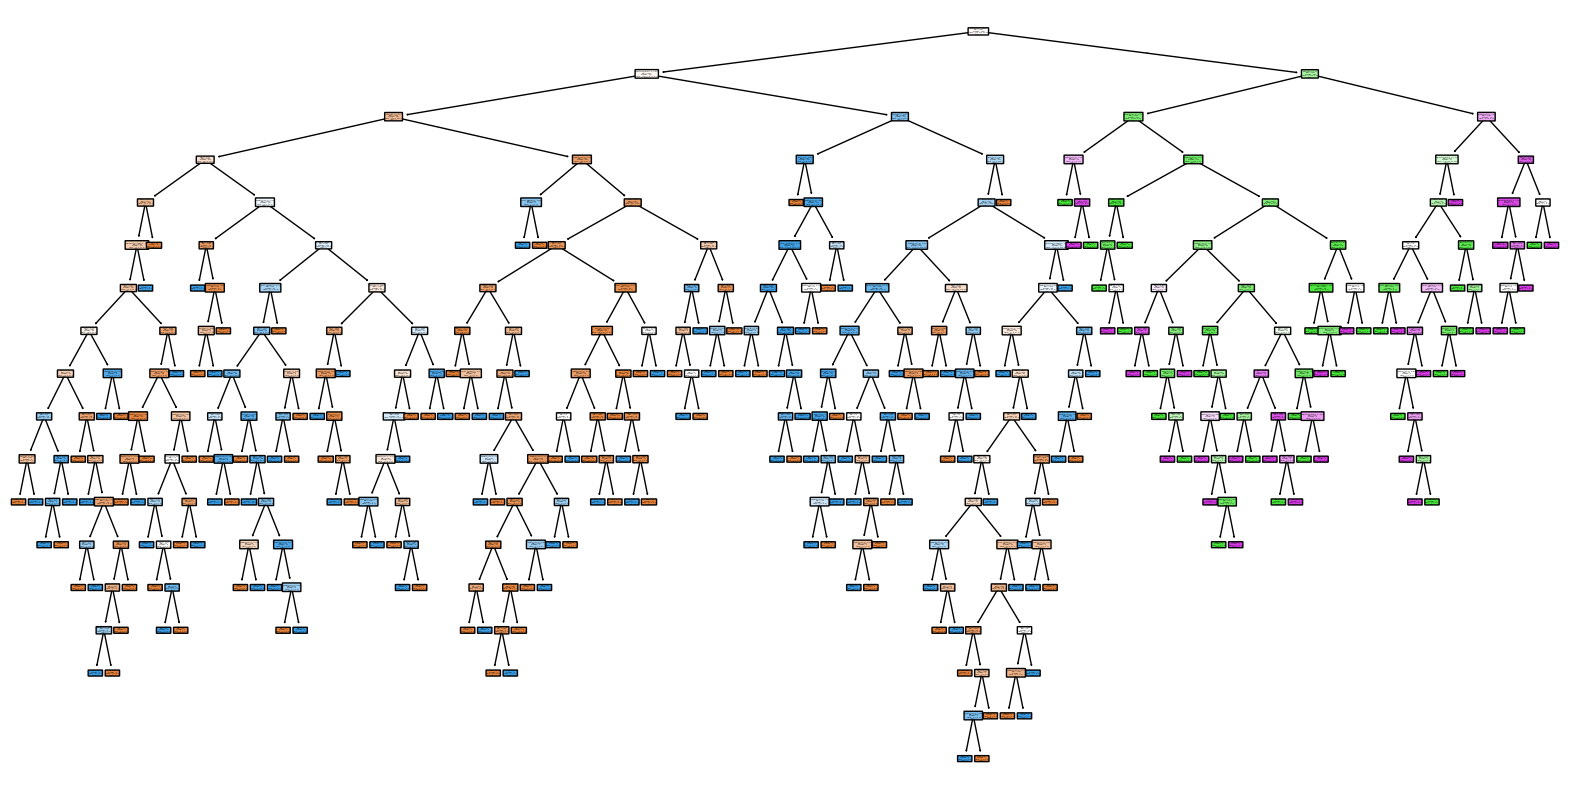

In [ ]:
from sklearn.tree import plot_tree

# Plot the trained decision tree
plt.figure(figsize=(20,10))
plot_tree(decisionTree_model, filled=True, feature_names=X.columns, class_names=np.unique(Y).astype(str), rounded=True)
plt.show()


In [ ]:
evaluate_model(decisionTree_model, X_test, Y_test)

Accuracy: 89.72%
Confusion Matrix:
[[162   0  20   0]
 [  0  74   0   0]
 [ 24   0 147   0]
 [  0   4   0  36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       182
           1       0.95      1.00      0.97        74
           2       0.88      0.86      0.87       171
           3       1.00      0.90      0.95        40

    accuracy                           0.90       467
   macro avg       0.92      0.91      0.92       467
weighted avg       0.90      0.90      0.90       467



**Feature Importance for Decision tree model**

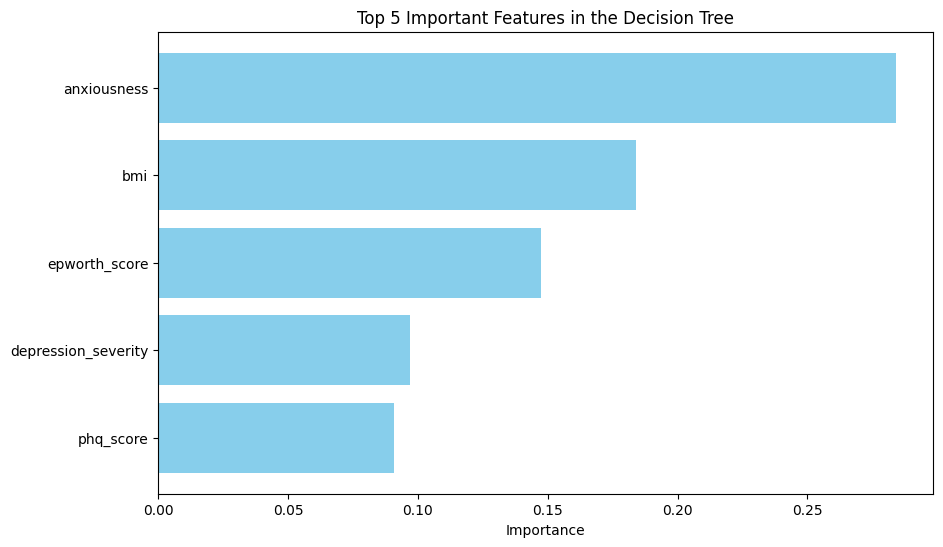

In [ ]:
# Get feature importances
importances = decisionTree_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Get the top 5 important features
top_5_features = [X.columns[i] for i in indices[:5]]
top_5_importances = importances[indices[:5]]

# Plot the top 5 important features
plt.figure(figsize=(10, 6))
plt.barh(top_5_features, top_5_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Top 5 Important Features in the Decision Tree')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

In [ ]:
# Convert to DataFrame
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test, columns=data.drop(columns=[target_column]).columns)

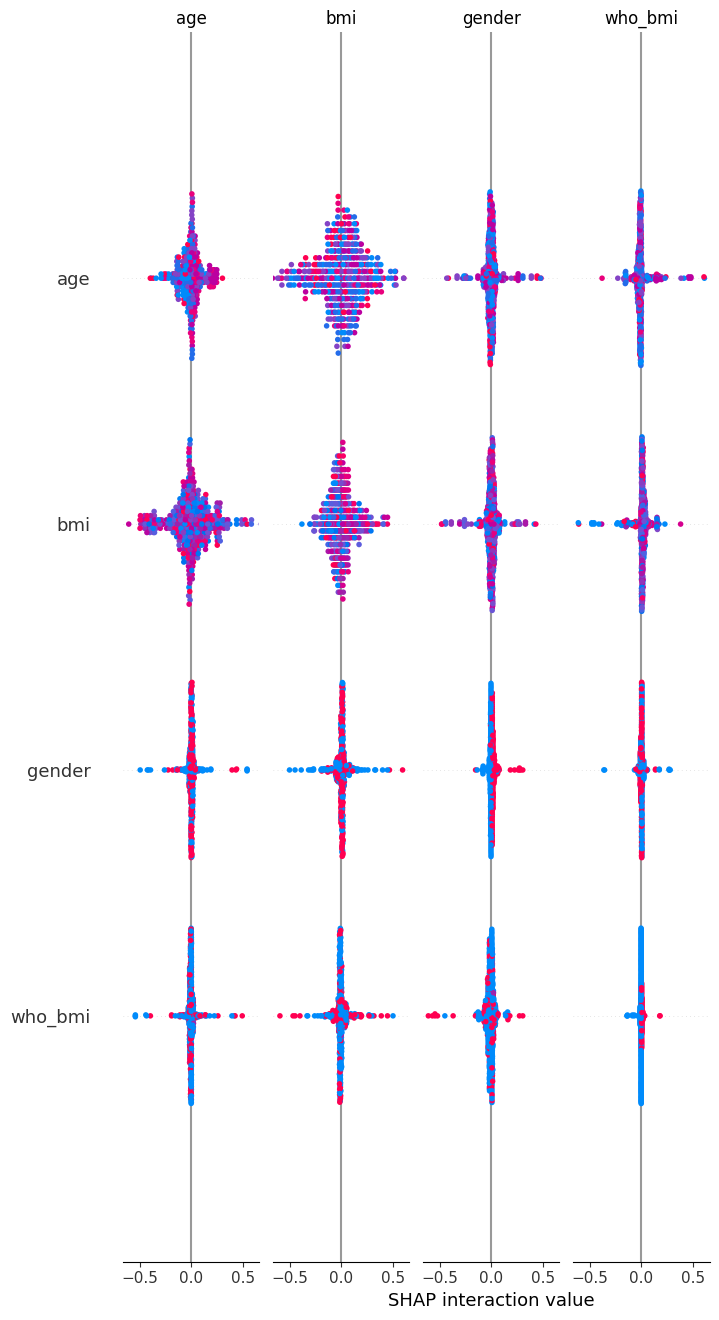

In [ ]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(decisionTree_model)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Display the full graph with all features

shap.summary_plot(shap_values, X_test, max_display=X_test.shape[1])


# 5.2 RandomForest Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [1, 2], # minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

# Print the accuracy for the best parameters
best_accuracy = grid_search.best_score_
print(f"Best Accuracy: {best_accuracy:.4f}")


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters:  {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.8620


In [ ]:
# Initialize the RandomForestClassifier with the best hyperparameters
best_rf_model = RandomForestClassifier(
    bootstrap=True,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

best_rf_model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
evaluate_model(best_rf_model, X_test, Y_test)

Accuracy: 91.01%
Confusion Matrix:
[[168   0  14   0]
 [  0  72   0   2]
 [ 18   0 153   0]
 [  0   8   0  32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       182
           1       0.90      0.97      0.94        74
           2       0.92      0.89      0.91       171
           3       0.94      0.80      0.86        40

    accuracy                           0.91       467
   macro avg       0.92      0.90      0.90       467
weighted avg       0.91      0.91      0.91       467



**Random-Forest: Handling class imbalance**

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [ ]:
rf_balancedmodel = RandomForestClassifier(
    bootstrap=True,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)
rf_balancedmodel.fit(X_train_smote, Y_train_smote)

evaluate_model(rf_balancedmodel, X_test, Y_test)

Accuracy: 91.43%
Confusion Matrix:
[[170   0  12   0]
 [  0  72   0   2]
 [ 18   0 153   0]
 [  0   8   0  32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       182
           1       0.90      0.97      0.94        74
           2       0.93      0.89      0.91       171
           3       0.94      0.80      0.86        40

    accuracy                           0.91       467
   macro avg       0.92      0.90      0.91       467
weighted avg       0.92      0.91      0.91       467



# 5.3 Gradient Boosting

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1
)

grid_search.fit(X_train_smote, Y_train_smote)
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Print the accuracy for the best parameters
best_accuracy = grid_search.best_score_
print(f"Best Accuracy: {best_accuracy:.4f}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
Best Accuracy: 0.9110


In [ ]:
gb_model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=6,
    n_estimators=200,
    subsample=0.8,
    random_state=42)

gb_model.fit(X_train_smote, Y_train_smote)

evaluate_model(gb_model, X_test, Y_test)

Accuracy: 90.58%
Confusion Matrix:
[[166   0  16   0]
 [  0  72   0   2]
 [ 18   0 153   0]
 [  0   8   0  32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       182
           1       0.90      0.97      0.94        74
           2       0.91      0.89      0.90       171
           3       0.94      0.80      0.86        40

    accuracy                           0.91       467
   macro avg       0.91      0.89      0.90       467
weighted avg       0.91      0.91      0.91       467



# 5.4. XGBoost

There is an issue with library.(earlier worked)

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1
)

grid_search.fit(X_train, Y_train)
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

In [ ]:
xgb_model = XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=200,
    subsample=0.8,
    random_state=42)

xgb_model.fit(X_train, Y_train)

evaluate_model(xgb_model, X_test, Y_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

# 6. Ensemble methods

# 6.1 Voting Classifier

Here we use previously tuned and trained random forest model and gradient boosting model.

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
# Creating the voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_balancedmodel),
        ('gb', gb_model)
    ],
    voting='soft'
)

In [ ]:
# Train the voting classifier
voting_clf.fit(X_train_smote, Y_train_smote)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(max_depth=6,
                                                         n_estimators=200,
                                                         random_state=42,
                                                         subsample=0.8))],
                 voting='soft')

In [ ]:
evaluate_model(voting_clf, X_test, Y_test)

Accuracy: 90.15%
Confusion Matrix:
[[164   0  18   0]
 [  0  72   0   2]
 [ 18   0 153   0]
 [  0   8   0  32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       182
           1       0.90      0.97      0.94        74
           2       0.89      0.89      0.89       171
           3       0.94      0.80      0.86        40

    accuracy                           0.90       467
   macro avg       0.91      0.89      0.90       467
weighted avg       0.90      0.90      0.90       467



In [ ]:
# Predicting the first 5 samples in the test set
for index, sample in enumerate(X_test[:5].to_numpy()):
    print(f"\nPredicting Sample {index + 1}...")

    # Collect predictions from individual models
    predictions = []
    for name, model in voting_clf.named_estimators_.items():
        pred = model.predict([sample])[0]
        predictions.append(pred)
        print(f"Model {name}: {pred}")

    # Final prediction from the voting classifier
    final_prediction = voting_clf.predict([sample])[0]
    true_label = Y_test.iloc[index]

    # Print results
    print(f"Ensemble Final Prediction: {final_prediction}")
    print(f"True Label: {true_label} - {'Correct' if final_prediction == true_label else 'Incorrect'}")



Predicting Sample 1...
Model rf: 0
Model gb: 0
Ensemble Final Prediction: 0
True Label: 0 - Correct

Predicting Sample 2...
Model rf: 0
Model gb: 0
Ensemble Final Prediction: 0
True Label: 0 - Correct

Predicting Sample 3...
Model rf: 1
Model gb: 1
Ensemble Final Prediction: 1
True Label: 1 - Correct

Predicting Sample 4...
Model rf: 0
Model gb: 0
Ensemble Final Prediction: 0
True Label: 0 - Correct

Predicting Sample 5...
Model rf: 2
Model gb: 2
Ensemble Final Prediction: 2
True Label: 0 - Incorrect


# 6.2 Stacking Classifier

In [ ]:
from sklearn.ensemble import StackingClassifier

# Define stacking classifier
stack = StackingClassifier(
    estimators=[('rf', rf_balancedmodel), ('gb', gb_model)],  # Base models
    final_estimator=RandomForestClassifier(random_state=42)  # Meta-model
)

# Train the stacking classifier
stack.fit(X_train_smote, Y_train_smote)

evaluate_model(stack, X_test, Y_test)

Accuracy: 91.43%
Confusion Matrix:
[[168   0  14   0]
 [  0  74   0   0]
 [ 18   0 153   0]
 [  0   8   0  32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       182
           1       0.90      1.00      0.95        74
           2       0.92      0.89      0.91       171
           3       1.00      0.80      0.89        40

    accuracy                           0.91       467
   macro avg       0.93      0.90      0.91       467
weighted avg       0.92      0.91      0.91       467



# 7. Justifaction for best model selection

To select the best model for this classification problem, we can analyze the performance metrics of each model, considering accuracy, precision, recall, and the F1-score.

1. **Accuracy:**
Stacking Classifier and Random Forest both achieve the highest accuracy of 91.43%, making them best models.

2. **Confusion Matrix Analysis**:
Stacking Classifier demonstrates fewer misclassifications overall, particularly for Class 0 and Class 1, which are critical to achieving balanced class predictions.


3. **Macro Average Scores**:
Macro Average Precision, Recall, and F1-Score: Stacking Classifier has the best macro average precision (0.93) and comparable recall and F1-score (0.90 and 0.91 respectively).



4. **Class-wise Performance**:
Stacking Classifier achieves perfect recall (1.00) for Class 1, ensuring it detects all instances of this class.
Also, stacking Classifier achieves a slightly better F1-score for Class 3 (0.89) compared to others.




5. **Ensemble Strength**:
The Stacking Classifier combines predictions from multiple models, using their complementary strengths. This can explain why it achieves consistently good results across all metrics.

While both Random Forest and Stacking Classifier achieve similar accuracy, the Stacking Classifier slightly stand out Random Forest in macro average precision and recall, making it a more balanced choice.


In conclusion,
The Stacking Classifier is the best model for this multi-class classification problem due to its highest accuracy, superior macro average precision, balanced class-specific performance, and robustness in combining predictions from different base models.